### batch_data_uniform

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV File
filename = "batch_data_uniform.csv"
data = pd.read_csv(filename)


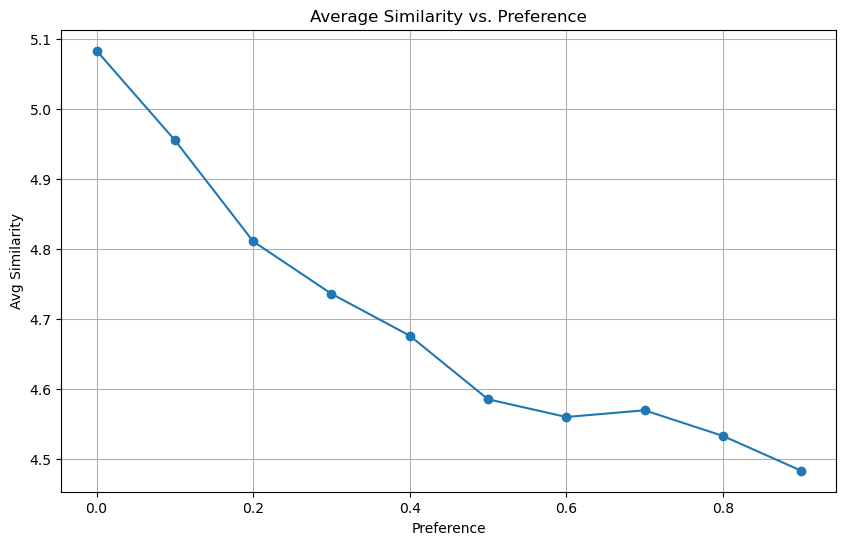

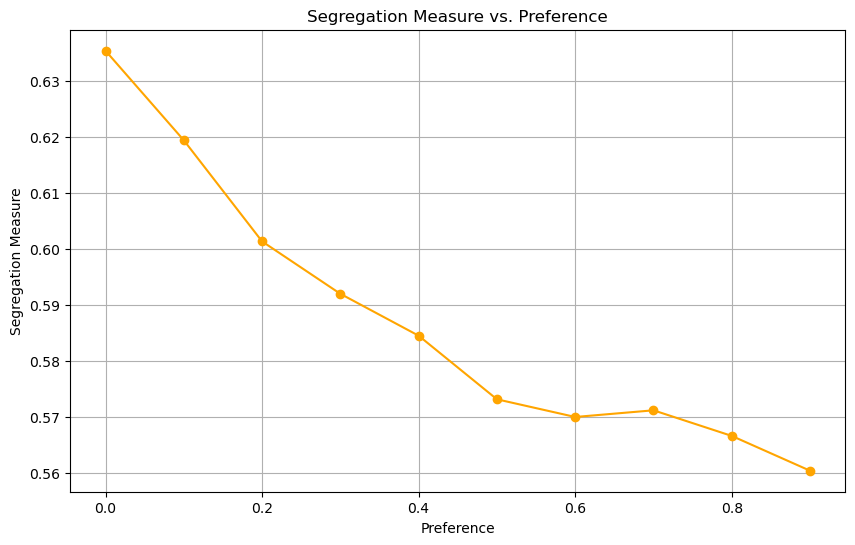

In [14]:
# Filter data for the largest step at each iteration
max_step_data = data.groupby('iteration').apply(lambda x: x[x['Step'] == x['Step'].max()])

# Calculate segregation for each iteration
avg_similarity = max_step_data.groupby('preference')['Number of Similar Neighbors'].mean()
segregation_measure = max_step_data.groupby('preference')['Number of Similar Neighbors'].mean() / 8

# Plot Avg Similarity vs. Preference
plt.figure(figsize=(10, 6))
plt.plot(avg_similarity.index, avg_similarity.values, marker='o')
plt.xlabel('Preference')
plt.ylabel('Avg Similarity')
plt.title('Average Similarity vs. Preference')
plt.grid(True)
plt.show()

# Plot Segregation vs. Preference
plt.figure(figsize=(10, 6))
plt.plot(segregation_measure.index, segregation_measure.values, marker='o', color='orange')
plt.xlabel('Preference')
plt.ylabel('Segregation Measure')
plt.title('Segregation Measure vs. Preference')
plt.grid(True)
plt.show()


### batch_data_beta_tolerance_changes

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv("batch_data_beta_tolerance_changes.csv")

# Filter data for the required steps (0, 25, 50, 100)
data = data[data['iteration'] == 0]
data = data[data['Step'].isin([0, 25, 50, 100])]

# Group data by tolerance and step
grouped = data.groupby(['tolerance', 'Step'])

# Define a function to calculate the dissimilarity index
def dissimilarity_index(df):
    minority_pc = df['minority_pc'].iloc[0]
    same_neighbors_minor = (df[df['Agent type'] == 1]['Similar Neighbors in This Neighborhood']/8).sum()
    same_neighbors_major = (df[df['Agent type'] == 0]['Similar Neighbors in This Neighborhood']/8).sum()
    total_agents = len(df)
    p = same_neighbors / (total_agents * 8)  # proportion of similar neighbors
    q = minority_pc
    return 0.5 * np.abs(p - q)

# Calculate dissimilarity index for each tolerance and step
segregation_index = grouped.apply(dissimilarity_index).unstack()

# Plot the results
plt.figure(figsize=(10, 6))
for tolerance, values in segregation_index.iterrows():
    plt.plot(values.index, values.values, label=f"Tolerance {tolerance}")

plt.title('Segregation Index Over Time')
plt.xlabel('Step')
plt.ylabel('Segregation Index')
plt.xticks([0, 25, 50, 100])
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'Similar Neighbors in This Neighborhood'